# NOAA GLERL Webcam Alignment  
This notebook is stored on my laptop in /njc/src/SSF  
It contains code used to learn how to align images from **View \#1 of NOAA GLERL Michigan City Webcam**

## Loading an image using matplotlib 
Using the matplotlib python library to load an image into a jupyter notebook.

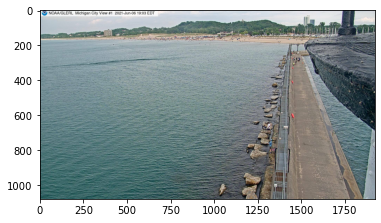

In [1]:
import matplotlib.pyplot as plt                      # import matplotlib 
img1 = plt.imread('MC20210606_2303_01_1903edt.jpg')  # define variable for image
plt.imshow(img1)                                     # display image

## Loading and converting the image into grayscale using PIL and matplot lib
Working with grayscale images can make it easier to align them.

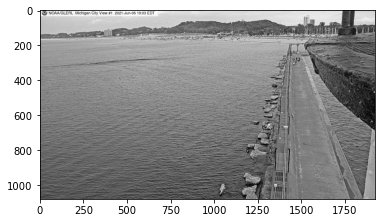

In [2]:
import matplotlib.pyplot as plt                       # import matplotlib 
from PIL import Image                                 # import tools from PIl
img = Image.open("MC20210606_2303_01_1903edt.jpg")    # open the color image
gray = img.convert('1')                               # convert image to black and white
plt.imshow(gray)                                      # display image


## Loading and converting the image into grayscale using only matplotlib

(1080, 1920, 3)


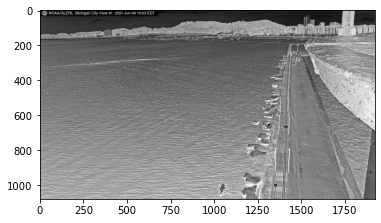

In [3]:
import matplotlib.pyplot as plt                       # import matplotlib 
import numpy as np                                    # importing NumPy

img1 = plt.imread('MC20210606_2303_01_1903edt.jpg')   # define variable for image
print (np.shape(img1))
gray2 = np.mean(img1, -1) # Getting the arithmatic average of the image along the last axis 
#plt.subplot(311)
#plt.imshow(img1[:,:,0], cmap = 'gray')
#plt.subplot(312)
#plt.imshow(img1[:,:,1], cmap = 'gray')
#plt.subplot(313)
#plt.imshow(img1[:,:,2], cmap = 'gray')
plt.imshow(gray-gray2, cmap = 'gray')     # displaying the image using a gray colormap

using wgt


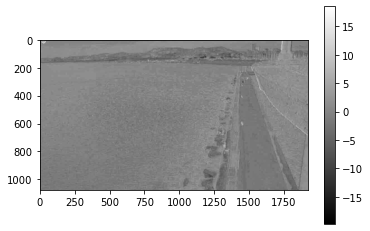

In [4]:
def rgb2gray (a, method = "avg"):
    s = np.shape(a)
    bw = np.zeros((s[0],s[1]))
    if method == "avg":
        w = np.array((1,1,1))/3.
        print ('using avg')
    elif method == "wgt":
        w = np.array((0.299,0.587,0.114))
        print('using wgt')
    else: 
        w = np.array((1,1,1))/3.  
        print ("defaulting to wgt")
    bw = a[:,:,0]*w[0]+a[:,:,1]*w[1]+a[:,:,2]*w[2]
    return bw

bw = rgb2gray(img1,"wgt")
plt.imshow(gray2-bw, cmap = 'gray')
plt.colorbar()

## Alignment Quiz (Answer reveal on Monday 06/14/2021!)
### Goals:  
* Write a function that will return an error metric so I can assess the differenes between the two images before and after I try to align them.
* Align two imagaes to a base reference image (one image is a shifted version of the refernece, the other is a different picture of the same view but from a different time)
    * Manually translate the images to align them until error metric is negligible. 
    * Write code that will automate the manual process using cross-correlation.   

Here is a link to a stack overflow page that had a lot of really useful examples for how to [compare two images](https://stackoverflow.com/questions/189943/how-can-i-quantify-difference-between-two-images)  
This stack overflow page is also helpful in doing manual image translation with a [translation matrix](https://stackoverflow.com/questions/54274185/shifting-an-image-by-x-pixels-to-left-while-maintaining-the-original-shape/54274222)

### Function that returns the norm of the elementwise difference of two arrays as an error metric

In [5]:
### Function to display imagesimport numpy as np                                    # import libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def arrray_dif(image1, image2):
    img1 = plt.imread(image1)
    img2 = plt.imread(image2)
    
    

### Function to display images

In [6]:
import numpy as np                                               #import libraries
import matplotlib.pyplot as plt
from PIL import Image 
import matplotlib.image as mpimg
from glob import glob

def plot_album(album_name):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    # this assumes the images are in images_dir/album_name/<name>.jpg
    image_paths = glob("imgname" + '/*.jpg')
    for imp, ax in zip(image_paths, axes.ravel()):
        img = mpimg.imread(imp)
        ax.imshow(img)
        ax.axis('off')
    fig.tight_layout()
    
